# Sales Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0 Primary observations
In this section we'll look at some simple numbers and observations in order to familiarize ourselves with the datasets. 

In [2]:
orders = pd.read_csv('Data/Processed/orders.csv')
products = pd.read_csv('products_by_sellers.csv')
pd.set_option('display.max_columns', None)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [3]:
products = products[np.isfinite(products['declared_monthly_revenue'])]
np.shape(products.declared_monthly_revenue.unique()) # declared_monthly_revenue not usable (too few elements)

(27,)

In [4]:
products = pd.read_csv('products_by_sellers.csv')
#products = products[np.isfinite(products['price'])]
products.head()                                         #not sure how this is as usefull as the 1st one    

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,Closed
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76,1


In [5]:
pd.crosstab(products['business_segment'], products['business_type'], margins=True).sort_values('All', ascending=False)

business_type,manufacturer,other,reseller,All
business_segment,,,,
All,829,3,4661,5493
health_beauty,58,0,810,868
watches,0,0,599,599
household_utilities,132,0,456,588
home_decor,168,0,344,512
construction_tools_house_garden,63,0,292,355
audio_video_electronics,66,0,242,308
pet,29,0,270,299
car_accessories,49,0,162,211


We can see that within all segments there are a total of 829 manufacturers and 4661 resellers.

In [6]:
products.business_segment.dropna().unique().shape

(33,)

In [7]:
# Contingency table based on products df.
ProductsContTable = pd.crosstab([products['business_segment'], products['business_type']], products['lead_type'], margins=True)
ProductsContTable

lead_type                                      industry  offline  \
business_segment                business_type                      
air_conditioning                reseller              0        0   
audio_video_electronics         manufacturer         10        0   
                                reseller             11       11   
baby                            manufacturer          0        0   
                                reseller              0        1   
bags_backpacks                  manufacturer          2        1   
                                reseller              0        9   
bed_bath_table                  manufacturer         17        0   
                                reseller              0        7   
books                           manufacturer          0        0   
                                reseller              3        0   
car_accessories                 manufacturer          3        1   
                                reseller             21       13   
computers                       reseller             12        5   
construction_tools_house_garden manufacturer         14        0   
                                reseller             40        9   
fashion_accessories             manufacturer          0        1   
                                reseller              4        1   
food_drink                      manufacturer          9        0   
                                reseller              3       17   
food_supplement                 manufacturer         26        1   
                                reseller              0        5   
games_consoles                  reseller              0        0   
gifts                           reseller              0        1   
handcrafted                     manufacturer          0        2   
                                reseller              0        5   
health_beauty                   manufacturer          7        7   
                                reseller              4       34   
home_appliances                 manufacturer         17        0   
                                reseller              0        0   
home_decor                      manufacturer         31        3   
                                reseller              3       12   
home_office_furniture           manufacturer          8       15   
                                reseller              1        1   
household_utilities             manufacturer         26        0   
                                reseller             23       17   
jewerly                         manufacturer          0        0   
                                reseller              1        1   
music_instruments               manufacturer          0        0   
                                reseller              1        0   
other                           other                 0        0   
party                           manufacturer          0        5   
                                reseller              0        0   
perfume                         reseller              0        0   
pet                             manufacturer          3        0   
                                reseller             17        2   
phone_mobile                    reseller              5        5   
religious                       manufacturer          0        0   
small_appliances                manufacturer          2        0   
                                reseller              0        0   
sports_leisure                  manufacturer          0        2   
                                reseller              1        1   
stationery                      manufacturer         27        0   
                                reseller              3        2   
toys                            manufacturer          2        0   
                                reseller              0       16   
watches                         reseller              0 

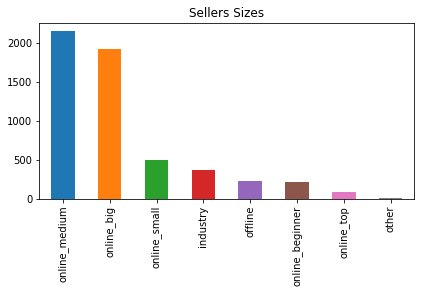

In [8]:
products.lead_type.dropna().value_counts().plot(kind='bar')
plt.tight_layout()
plt.title('Sellers Sizes')
plt.savefig(fname='Seller sizes',format='eps')

In [9]:
(products.lead_type.dropna().value_counts()[0]+products.lead_type.dropna().value_counts()[1])/products.lead_type.dropna().value_counts().sum()

0.7462878093492209

## 1. Conclusif traffic sources
In this section we will look at the different ways through which a potential buyer can step upon a products and potentially buy it. We will then calculate a **success rate** for each way.

In [10]:
products.origin.unique()

array(['social', 'paid_search', 'organic_search', 'email', 'unknown',
       'referral', 'direct_traffic', 'display', nan, 'other_publicities',
       'other'], dtype=object)

In [11]:
sources = products[['origin','Closed']].dropna()   #droping NaN lines (there were only 67 NaN vales)

In [12]:
# Now let's calculate a success rate for each traffic source

rate = np.zeros(sources.origin.unique().shape[0])
tot = np.zeros(sources.origin.unique().shape[0])
for i in range(sources.origin.unique().shape[0]):
    rate[i]=sources[sources.origin==sources.origin.unique()[i]].Closed.sum()/sources[sources.origin==sources.origin.unique()[i]].shape[0]
    tot[i]=sources[sources.origin==sources.origin.unique()[i]].shape[0]
rateindices = np.argsort(rate)

C:\Users\Mathieu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


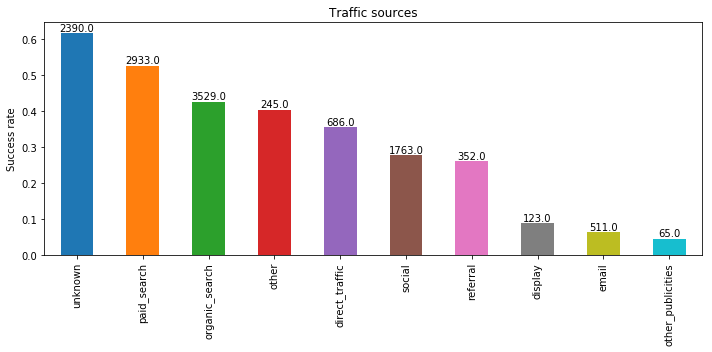

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(10,5))
ax = pd.Series.from_array(rate[rateindices][::-1]).plot(kind='bar')

plt.ylabel('Success rate')
plt.title('Traffic sources')
ax.set_xticklabels(sources.origin.unique()[rateindices][::-1])

rects = ax.patches
for rect, lab in zip(rects, tot[rateindices][::-1]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height , lab,
            ha='center', va='bottom')
plt.tight_layout()
plt.show() # The total number of traffics is shown above each bar.
plt.savefig(fname='traffic_sources.eps',format='eps')

# 2. Sales Periods
In this section we will try to see if there are any months in the year where sales can be boosted (by different means like marketing, advertising, etc.) because there are naturally more sales in that month.

In [14]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

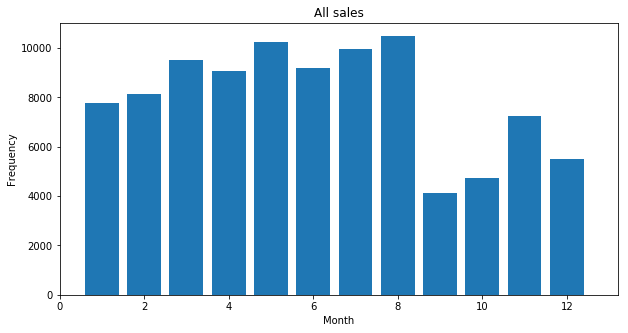

In [40]:
plt.figure(figsize=(10,5))
orders.order_purchase_timestamp.dt.month.dropna().plot.hist(bins=12,range=(0.6,12.6),width=0.8)
plt.xlabel("Month")
plt.title("All sales")
plt.savefig(fname='Sales_periods_all.eps',format='eps')

We can see that there is a drop of sales from August to September. The months with the most sales are May, July and August.

# 2.1 Sales Periods per Category
In this section we do the same but for each category of sold objects (pet, toys, books. etc.)

In [16]:
product_orders = orders[['product_category_name','order_purchase_timestamp']].dropna()
product_orders["order_purchase_timestamp"] = pd.to_datetime(product_orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S.%f')

In [17]:
names = pd.read_csv("Data/E-Commerce/product_category_name_translation.csv")
dico = list(zip(names.product_category_name, names.product_category_name_english))

In [18]:
d = {}
for pt, eng in dico :
    d[pt] = eng

In [19]:
product_orders.product_category_name.replace(d, inplace=True) #translating portugese category names to english
categories = product_orders.product_category_name.dropna().unique()
num_categories = categories.shape[0]
num_categories

73

In [20]:
categories

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery',
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'fashion_underwear_beach',
       'fashion_bags_accessories', 'musical_instruments',
       'luggage_accessories', 'construction_tools_lights',
       'books_technical', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_shoes',
       'home_construction', 'audio', 'home_appliances_2',

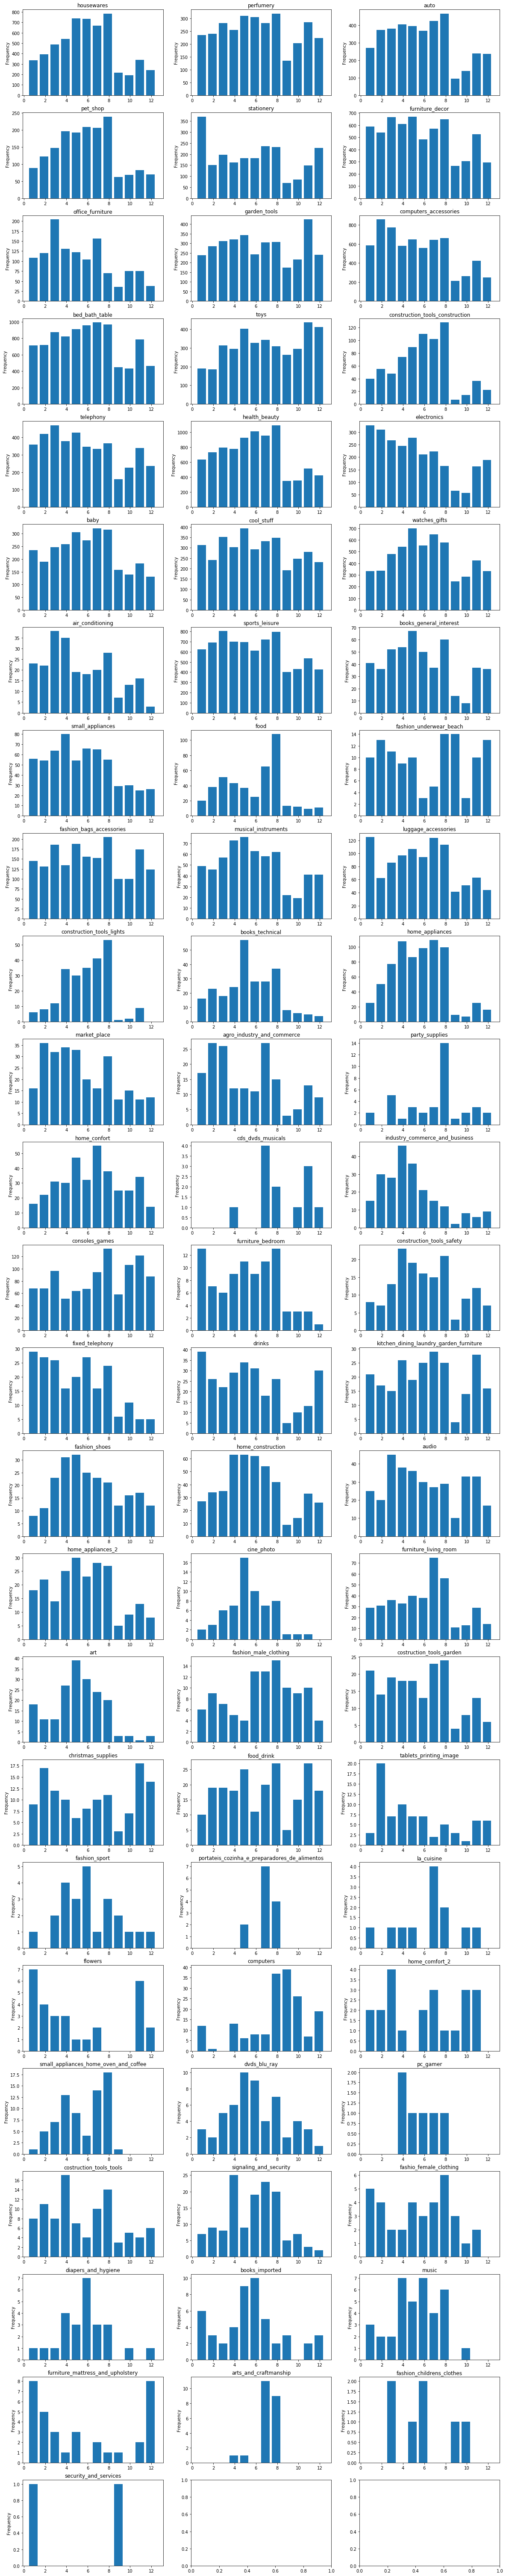

In [21]:
fig, axes = plt.subplots(25, 3, figsize=(20,110))
axes = axes.ravel()
for i in range(num_categories):
    product_orders[product_orders.product_category_name==categories[i]].order_purchase_timestamp.dt.month.dropna().plot.hist(bins=12, ax=axes[i], range=(0.6,12.6),width=0.8)
    axes[i].set_title(categories[i])
plt.show()

In [22]:
totalorders = np.zeros(num_categories)
for i in range(num_categories):
    totalorders[i] = product_orders[product_orders.product_category_name==categories[i]].shape[0]
    
indices = np.argsort(totalorders)

In [23]:
categories[indices[-7:]] # 7 largest categories

array(['watches_gifts', 'housewares', 'furniture_decor',
       'computers_accessories', 'sports_leisure', 'health_beauty',
       'bed_bath_table'], dtype=object)

In [24]:
totalorders[indices[-7:]].sum()/totalorders.sum() # percentage of orders made within the 7 biggest categories.

0.5160001690902942

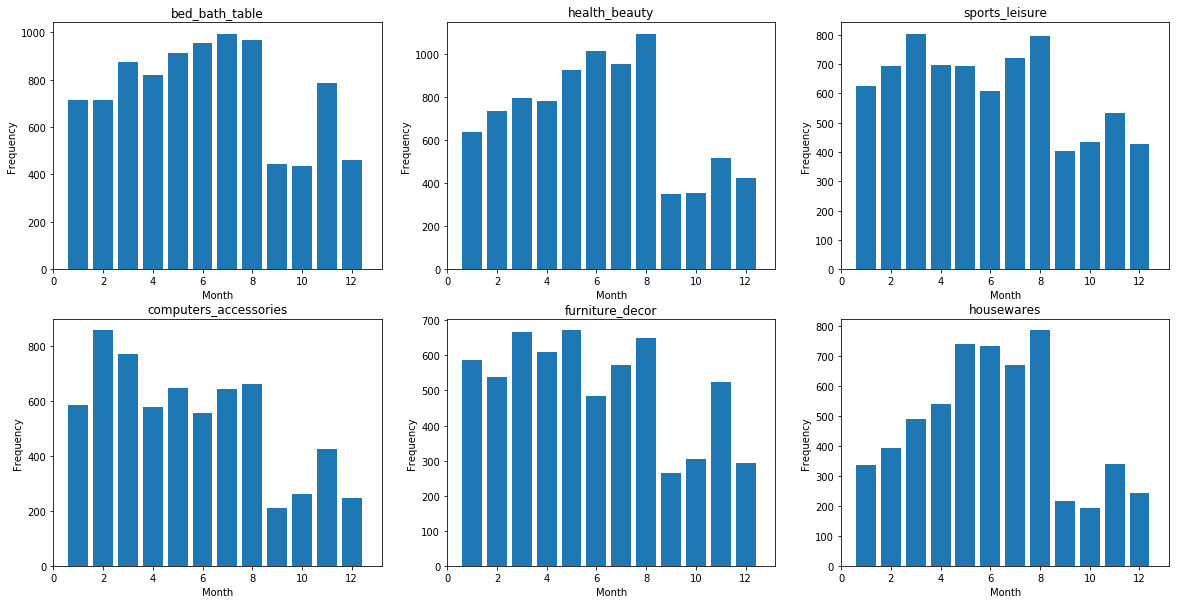

<Figure size 432x288 with 0 Axes>

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = axes.ravel()
for i in range(6):
    product_orders[product_orders.product_category_name==categories[indices[-i-1]]].order_purchase_timestamp.dt.month.dropna().plot.hist(bins=12, ax=axes[i], range=(0.6,12.6),width=0.8)
    axes[i].set_title(categories[indices[-i-1]])
    axes[i].set_xlabel('Month')
plt.show()
plt.savefig(fname='Sales_periods_top6.eps',format='eps')

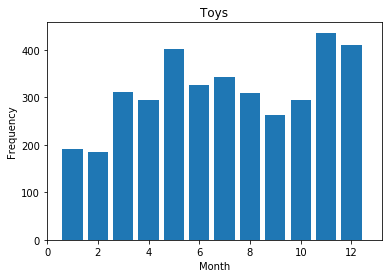

In [41]:
product_orders[product_orders.product_category_name=='toys'].order_purchase_timestamp.dt.month.dropna().plot.hist(bins=12,  range=(0.6,12.6),width=0.8)
plt.xlabel('Month')
plt.title('Toys')
plt.savefig(fname='Sales_periods_toys.eps',format='eps')